#Loan Approval

---
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

We will use two datasets: the **train.csv** and **test.csv** files

Combine the two dataset in order to apply the same preprocessing steps in both dataframes

In [5]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df=df_train.append(df_test)
df.head()

<ipython-input-5-7abf88700452>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 3. Exploratory Data Analysis


**Question 1:** Use the shape function to check the dimensions of your dataframe

In [6]:
df.shape



(614, 13)

##### Using the function info(), we can check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 100
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


**Question 2:** Which Columns contain Missing Values?






Analysis: Gender - Married - Dependence - Self employed - Loadamount - Credit history

##### Using the function describe(), we can check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Question 3:** Which feature is not actually numerical and yet was included in the above statistical description?

**Analysis**: Credit history

In [9]:
np.sort(df.Credit_History.unique())

array([ 0.,  1., nan])

**Question 4:** Write the code to get unique values of the Loan_Amount_Term variable and sort the values

Loan_Amount_Term is a variable of numerical discrete data type

In [10]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

#### Remove Na and create a density graph

<ipython-input-11-972ad0c805d5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['LoanAmount']);


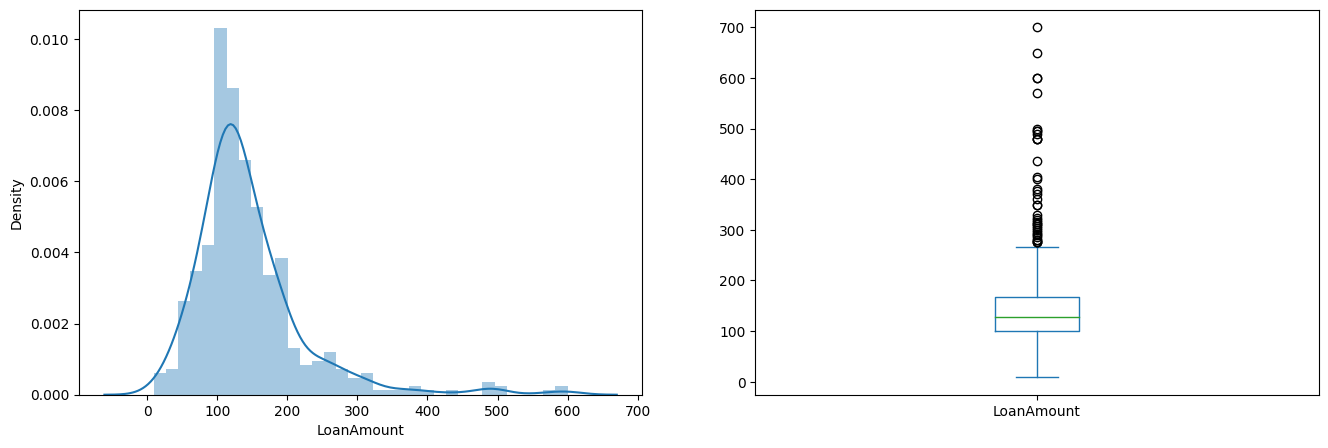

In [11]:
plt.figure(1)
plt.subplot(121)
removeNA_df=df.dropna() # we need to remove Na in order to plot a density graph
sns.distplot(removeNA_df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

**Question 5:** Do you notice any outliers?



Analysis: Yes. There are outliers


**Question 6:** Draw the same plots for the ApplicantIncome Feature and check if there are any outliers.

<ipython-input-12-a0e76db84bb9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['LoanAmount']);


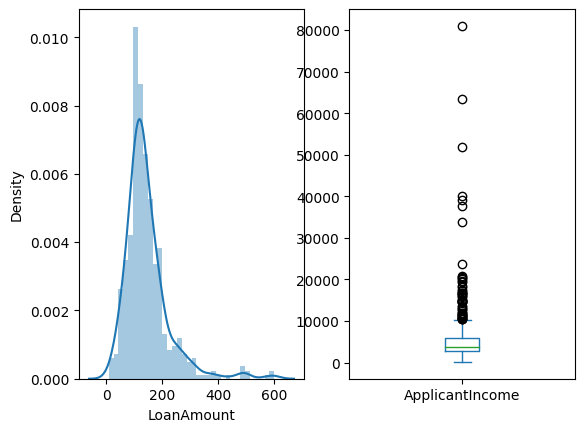

In [12]:
plt.figure(1)
plt.subplot(121)
removeNA_df=df.dropna() # we need to remove Na in order to plot a density graph
sns.distplot(removeNA_df['LoanAmount']);

plt.subplot(122)
df['ApplicantIncome'].plot.box()

plt.show()


### Check if the gender affects the loan approval

Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


<Axes: xlabel='Gender'>

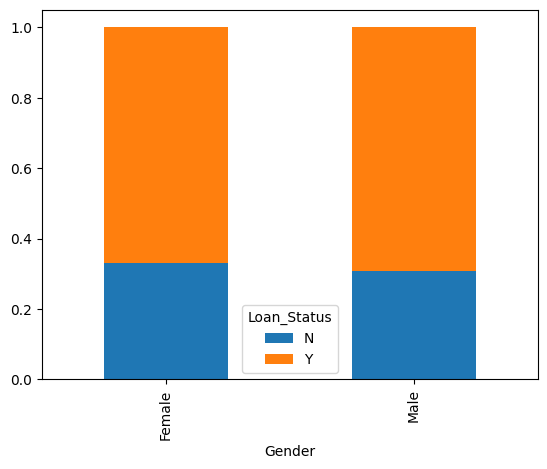

In [13]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'], normalize='index')
print(Gender)
Gender.plot(kind='bar', stacked=True)

**Question 7:**

a. Does gender affect loan approval?

b. Suggest another method to study this relation

Analysis:
A. No it doesn't, there is no diffrence between male and female loan approval.
B. Using a corellation matrix and scatter plot.

# 4. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: normalize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns
Here we will drop some columns we beleive they do not affect the loan approval.

In [14]:
df.drop(['Loan_ID','Gender','Self_Employed','ApplicantIncome','LoanAmount','Loan_Amount_Term'], inplace=True, axis=1)

##Convert continous data into categorical

In [15]:
df['Credit_History'] = df['Credit_History'].astype('O')

## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continous data with mean


In [16]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

## Check if any null value exist

**Question 8:** Write the code to check for any null values

In [17]:
df.isnull().any()

Married              False
Dependents           False
Education            False
CoapplicantIncome    False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

## Encode categorical data

In [18]:
le = LabelEncoder()
cat_data=df[['Credit_History','Dependents','Education','Married','Property_Area','Loan_Status']]
num_data=df[['CoapplicantIncome']]
cat_data.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1.0,0,Graduate,No,Urban,Y
1,1.0,1,Graduate,Yes,Rural,N
2,1.0,0,Graduate,Yes,Urban,Y
3,1.0,0,Not Graduate,Yes,Urban,Y
4,1.0,0,Graduate,No,Urban,Y


In [19]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data.head()

<ipython-input-19-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])
<ipython-input-19-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])
<ipython-input-19-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,1,0,0
2,1,0,0,1,2,1
3,1,0,1,1,2,1
4,1,0,0,0,2,1


## Combine both cat_data and numerical_data

In [20]:
df = pd.concat([cat_data, num_data], axis=1)
df.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome
0,1,0,0,0,2,1,0.0
1,1,1,0,1,0,0,1508.0
2,1,0,0,1,2,1,0.0
3,1,0,1,1,2,1,2358.0
4,1,0,0,0,2,1,0.0


## Normalization

**Question 9:** Normalize data ranges for all features (e.g., between 0 and 1)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
df = pd.DataFrame(scalar.fit_transform(df), columns = df.columns)
print(scalar.fit_transform(df))

[[1.         0.         0.         ... 1.         1.         0.        ]
 [1.         0.33333333 0.         ... 0.         0.         0.03619171]
 [1.         0.         0.         ... 1.         1.         0.        ]
 ...
 [1.         0.33333333 0.         ... 1.         1.         0.00575995]
 [1.         0.66666667 0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 0.5        0.         0.        ]]


# 5. Training & Validating

We split the data between training and testing.
Then, we train a model to predict the loan status

In [31]:
input_variables = ['Credit_History','Dependents','Education','Married','Property_Area','CoapplicantIncome']
x = df[input_variables]
y = df['Loan_Status']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size =0.3)

##Creating & Fitting the model

In [32]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

##Validating the model

In [33]:
pred_val = model.predict(x_val)
accuracy_score(y_val,pred_val)

0.8324324324324325